# Image Recognition using CIFAR10 Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import layers, datasets, Sequential

from sklearn.metrics import classification_report, confusion_matrix

### Load the dataset from tensorflow

In [2]:
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')

X train shape: (50000, 32, 32, 3)
X test shape: (10000, 32, 32, 3)


In [4]:
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

y train shape: (50000, 1)
y test shape: (10000, 1)


### Sample image

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

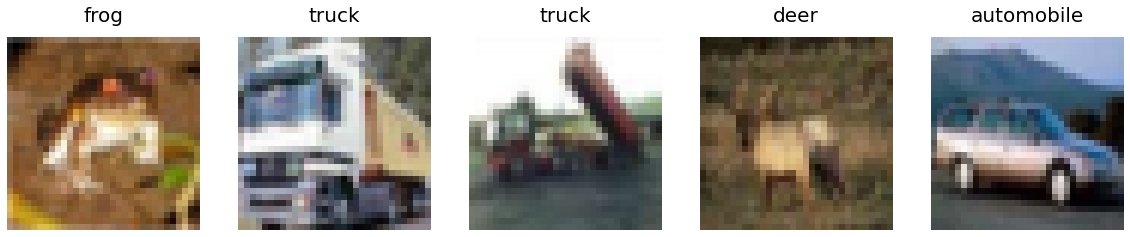

In [6]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig,ax = plt.subplots(ncols=5,figsize=(20,4),sharey=True)

for i in range(5):
  ax[i].set_title(labels[y_train[i][0]],fontsize=20)
  ax[i].matshow(X_train[i])
  ax[i].axis('off')

### Normalize the values

In [7]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

### Model Building

In [8]:
# to handle overfitting
data_augmentation = Sequential(
  [
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
  ]
)

model = Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(32,(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.2)),
model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.2)),
model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.2)),
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,batch_size=64,validation_split=0.2,epochs=150)

Epoch 1/150
625/625 [==============================] - 7s 7ms/step - loss: 1.9624 - accuracy: 0.2610 - val_loss: 1.4822 - val_accuracy: 0.4607
Epoch 2/150
625/625 [==============================] - 3s 6ms/step - loss: 1.4934 - accuracy: 0.4538 - val_loss: 1.3511 - val_accuracy: 0.5194
Epoch 3/150
625/625 [==============================] - 3s 5ms/step - loss: 1.3437 - accuracy: 0.5103 - val_loss: 1.2608 - val_accuracy: 0.5508
Epoch 4/150
625/625 [==============================] - 3s 6ms/step - loss: 1.2631 - accuracy: 0.5429 - val_loss: 1.1070 - val_accuracy: 0.6026
Epoch 5/150
625/625 [==============================] - 3s 5ms/step - loss: 1.2016 - accuracy: 0.5665 - val_loss: 1.0913 - val_accuracy: 0.6157
Epoch 6/150
625/625 [==============================] - 3s 6ms/step - loss: 1.1408 - accuracy: 0.5936 - val_loss: 1.0213 - val_accuracy: 0.6378
Epoch 7/150
625/625 [==============================] - 3s 5ms/step - loss: 1.1021 - accuracy: 0.6055 - val_loss: 0.9924 - val_accuracy: 0.6542

### Model evaluation


In [9]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6545 - accuracy: 0.7872


[0.6545171737670898, 0.7871999740600586]

In [10]:
predictions = model.predict(X_test)
max_predictions = [np.argmax(value) for value in predictions]
max_predictions[:5]

[5, 8, 8, 0, 6]

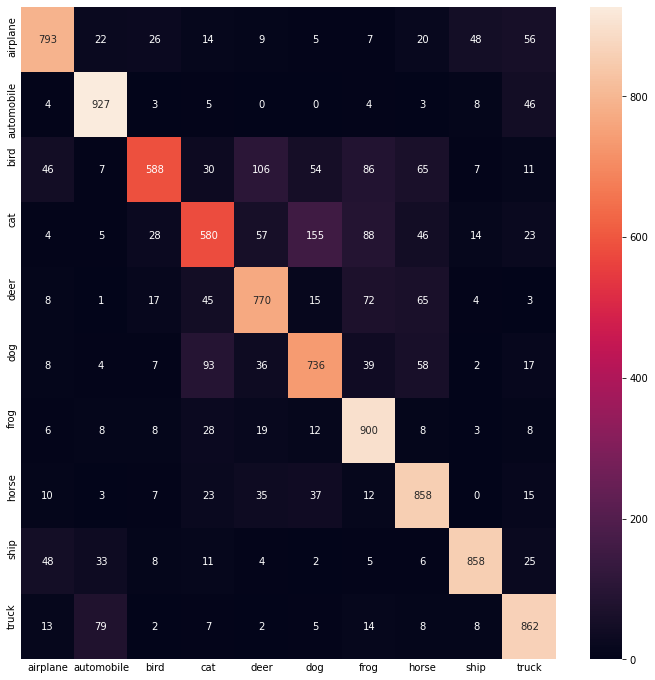

In [11]:
img_recog_confusion_matrix = confusion_matrix(y_test.reshape(10000,),max_predictions)
plt.figure(figsize=(12,12))
sns.heatmap(img_recog_confusion_matrix,annot=True,fmt='d')
plt.xticks(np.arange(10)+0.5,labels)
plt.yticks(np.arange(10)+0.2,labels)
plt.tick_params(length=0)
plt.show()

In [12]:
img_recog_classification_report = classification_report(y_test.reshape(10000,),max_predictions)
print(img_recog_classification_report)

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1000
           1       0.85      0.93      0.89      1000
           2       0.85      0.59      0.69      1000
           3       0.69      0.58      0.63      1000
           4       0.74      0.77      0.76      1000
           5       0.72      0.74      0.73      1000
           6       0.73      0.90      0.81      1000
           7       0.75      0.86      0.80      1000
           8       0.90      0.86      0.88      1000
           9       0.81      0.86      0.83      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.78     10000
weighted avg       0.79      0.79      0.78     10000



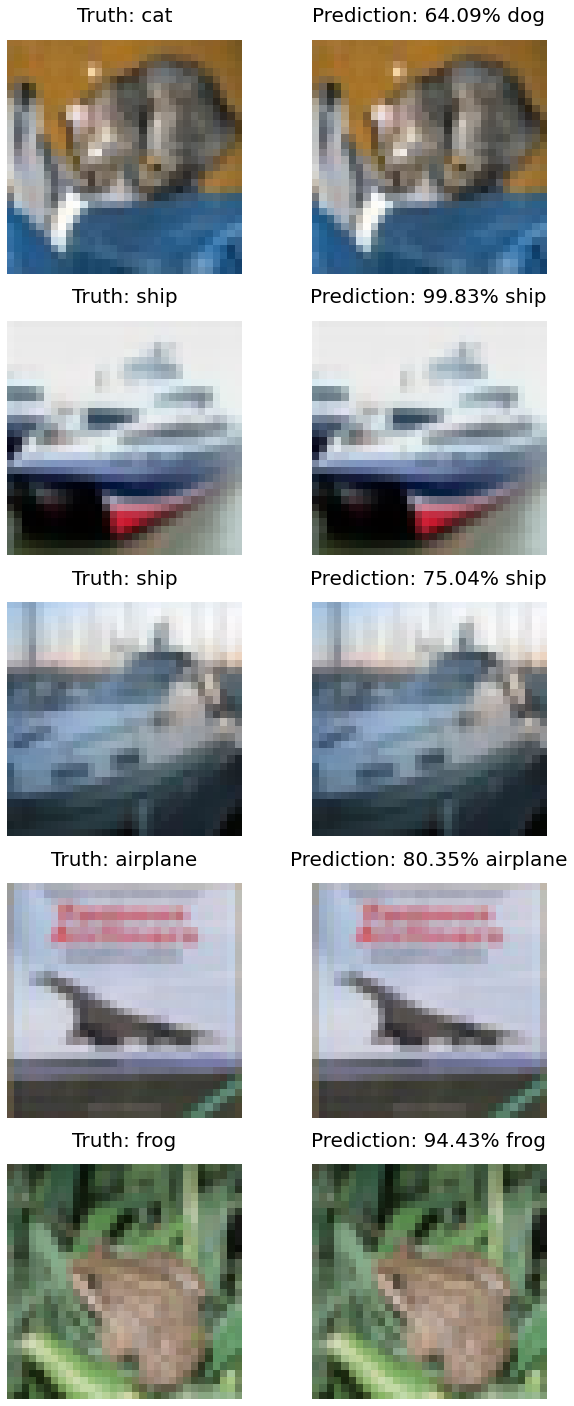

In [13]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig,ax = plt.subplots(nrows=5,ncols=2,figsize=(10,25),sharey=True)

for i in range(5):
  ax[i][0].set_title('Truth: {}'.format(labels[y_test[i][0]]),fontsize=20)
  ax[i][0].matshow(X_test[i])
  ax[i][0].axis('off')
  percentage = str(round(max(predictions[i])*100,2))
  ax[i][1].set_title('Prediction: {}% {}'.format(percentage,labels[max_predictions[i]]),fontsize=20)
  ax[i][1].matshow(X_test[i])
  ax[i][1].axis('off')

### Prediction with new images

In [14]:
import pathlib
from PIL import Image

test_data_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/cifar10_test')
images_path = list(test_data_dir.glob('*'))
images_path

[PosixPath('/content/drive/MyDrive/Colab Notebooks/cifar10_test/horse.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/cifar10_test/airplane.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/cifar10_test/automobile.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/cifar10_test/bird.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/cifar10_test/cat.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/cifar10_test/deer.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/cifar10_test/dog.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/cifar10_test/frog.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/cifar10_test/ship.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/cifar10_test/truck.jpg')]

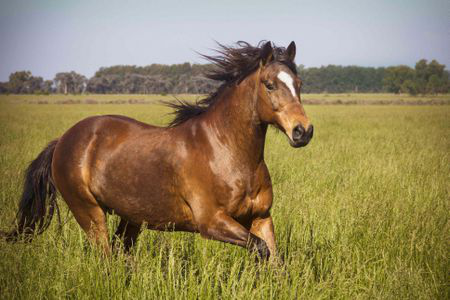

In [15]:
img = tf.keras.preprocessing.image.load_img(str(images_path[0]))
img

In [16]:
print('Images shape\n')
for path in images_path:
  img = tf.keras.preprocessing.image.load_img(str(path))
  shape = tf.keras.preprocessing.image.img_to_array(img).shape
  print('{} shape: {}'.format(path.name,shape))

Images shape

horse.jpg shape: (300, 450, 3)
airplane.jpg shape: (438, 780, 3)
automobile.jpg shape: (200, 200, 3)
bird.jpg shape: (1280, 1280, 3)
cat.jpg shape: (433, 650, 3)
deer.jpg shape: (667, 1000, 3)
dog.jpg shape: (900, 1200, 3)
frog.jpg shape: (365, 512, 3)
ship.jpg shape: (524, 932, 3)
truck.jpg shape: (933, 1400, 3)


In [17]:
new_images_predictions = []

for path in images_path:
  img = tf.keras.preprocessing.image.load_img(str(path))
  img_resized = np.array(img.resize((32,32)))
  prediction = np.around(model.predict(np.expand_dims(img_resized, axis=0))*100,2)
  new_images_predictions.append(prediction)
  
new_images_predictions[0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0., 100.,   0.,   0.]],
      dtype=float32)

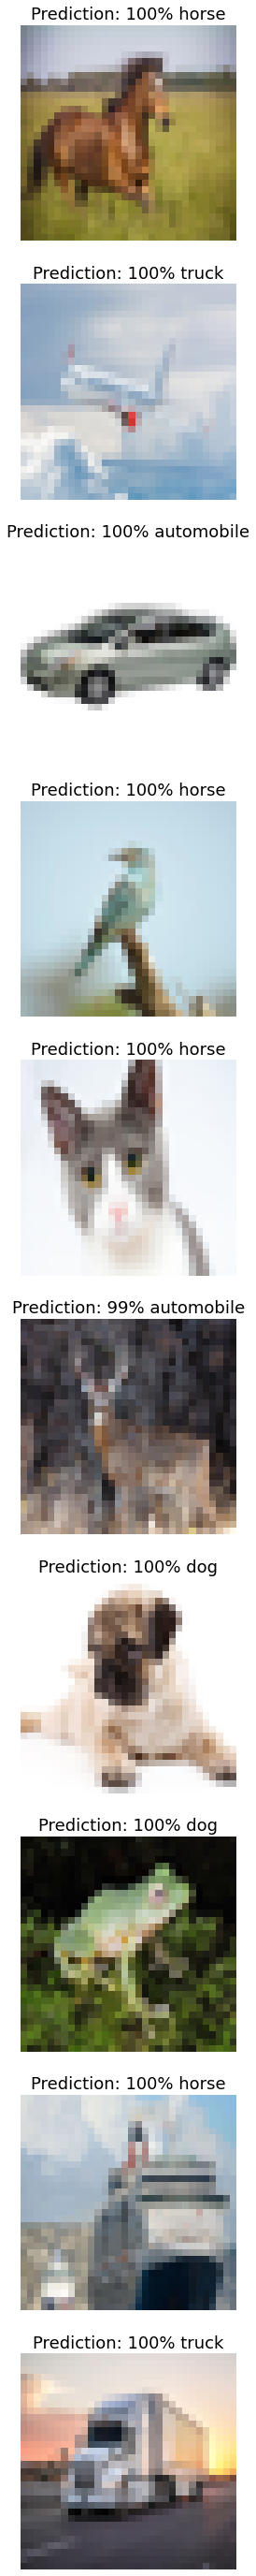

In [18]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig,ax = plt.subplots(nrows=10,figsize=(5,50),sharey=True)

for index,path in enumerate(images_path):
  percentage = int(max(new_images_predictions[index][0]))
  label = labels[np.argmax(new_images_predictions[index])]
  ax[index].set_title('Prediction: {}% {}'.format(percentage,label),fontsize=18)
  img = tf.keras.preprocessing.image.load_img(str(path))
  img_resized = np.array(img.resize((32,32)))
  ax[index].imshow(img_resized)
  ax[index].axis('off')